In [1]:
# Importing all the important libraries
import pandas as pd
from sklearn.datasets import load_diabetes
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = load_diabetes()

In [3]:
#description of the dataset
df['DESCR']

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [4]:
cols = df.feature_names

In [5]:
target = df.target

In [6]:
data = df.data

In [7]:
data = pd.DataFrame(columns = cols, data = data)

In [8]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [9]:
data.shape

(442, 10)

In [10]:
data.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [11]:
sns.set_style('darkgrid')

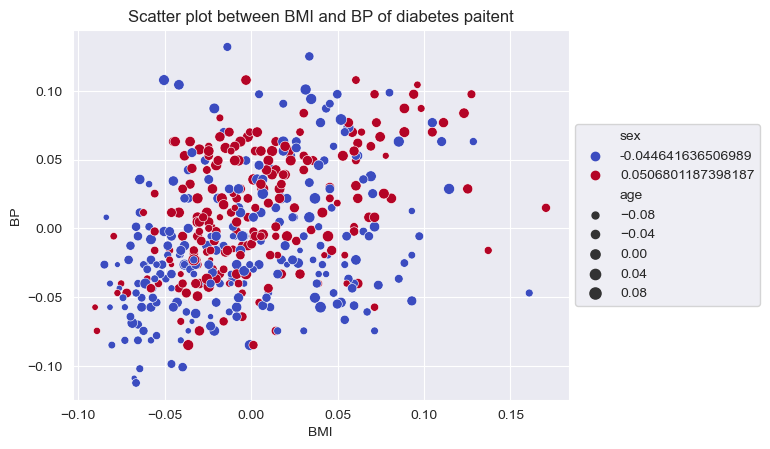

In [12]:
plt.title('Scatter plot between BMI and BP of diabetes paitent')
plt.xlabel('BMI')
plt.ylabel('BP')
sns.scatterplot(x = 'bmi', y='bp', hue ='sex', size = 'age', data = data, palette ='coolwarm')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#here values are encoded, for that reason, values are in float form.

In [13]:
target.shape

(442,)

In [14]:
target = pd.DataFrame(data = target)

In [15]:
target.head()

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [16]:
target.isnull().sum()

0    0
dtype: int64

In [17]:
#creating the object of the model
lr = LinearRegression()

In [18]:
#splitting the model
x_train,x_test, y_train, y_test = train_test_split(data, target, test_size = 0.25, random_state=105)

In [19]:
lr.fit(x_train, y_train)

LinearRegression()

In [20]:
pred = lr.predict(x_test)

In [21]:
print('MSE:',metrics.mean_squared_error(y_test, pred))
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('R2-Score:',(metrics.r2_score(y_test, pred)*100))

MSE: 3280.2014764735004
MAE: 47.73346525837847
R2-Score: 48.356547452400164


Text(0, 0.5, 'True y value')

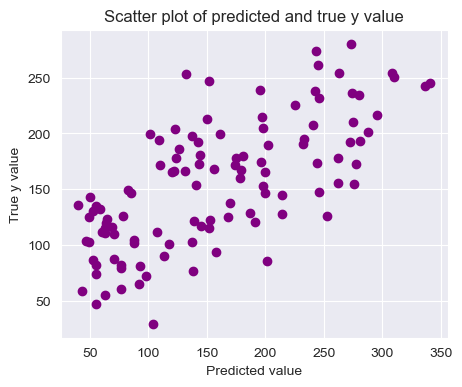

In [22]:
plt.figure(figsize = (5,4))
plt.scatter(x = y_test, y = pred, color = 'purple')
plt.title('Scatter plot of predicted and true y value')
plt.xlabel('Predicted value')
plt.ylabel('True y value')

In [23]:
res = pd.DataFrame(y_test-pred)

<AxesSubplot:title={'center':'Residuals'}, ylabel='Density'>

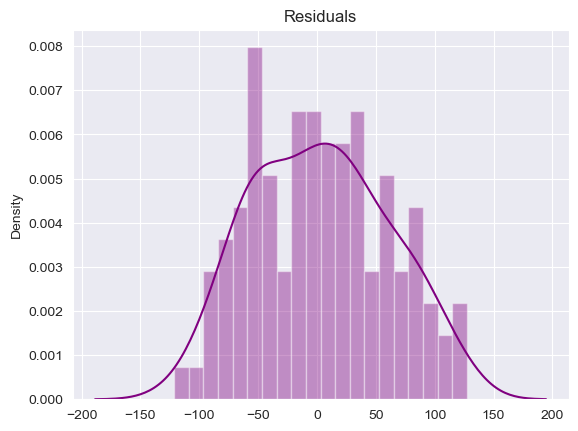

In [24]:
plt.title('Residuals')
sns.distplot(res, bins = 20, color ='purple')